<a href="https://colab.research.google.com/github/RCML2016/BostonHousing-LinearRegression-ScikiLearn.ipynb/blob/main/BostonHousing_LinearRegression_ScikiLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
#Import the necessary packages

import pandas as pd
from sklearn import datasets
boston_raw=datasets.load_boston()

In [71]:
#convert the boston_raw into a data frame, so that we can asnlyze the data dnd easilli.
boston=pd.DataFrame(boston_raw.data,columns=boston_raw.feature_names)
#
boston['MEDV']=boston_raw.target

print(boston.shape)
boston.head(10)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [72]:
#Analyze all the coloumn data types
#boston.dtypes, boston.info(), 
boston.describe()
#boston.info()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [73]:
boston.groupby('MEDV').size()

MEDV
5.0      2
5.6      1
6.3      1
7.0      2
7.2      3
        ..
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
Length: 229, dtype: int64

In [74]:
#Spilit the Data into Training and Testing sets

from sklearn import model_selection

#Create Train and Test Set split

boston_train, boston_test=model_selection.train_test_split(boston,test_size=0.2,train_size=0.8,random_state=1) 
#Note1:-Random State is an Optional value . In case if we dont mention , every iteration when we run this cell a new set of (different) train set will be formed and consumed in the Rest of the model generation
print ("shape of the Original Boston Data:", boston.shape)
print ("shape of the Original Boston Train Data:", boston_train)
print ("shape of the Original Boston Test Data:", boston_test)

shape of the Original Boston Data: (506, 14)
shape of the Original Boston Train Data:          CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
42    0.14150   0.0   6.91   0.0  0.448  ...  233.0     17.9  383.37   5.81  25.3
58    0.15445  25.0   5.13   0.0  0.453  ...  284.0     19.7  390.68   6.86  23.3
385  16.81180   0.0  18.10   0.0  0.700  ...  666.0     20.2  396.90  30.81   7.2
78    0.05646   0.0  12.83   0.0  0.437  ...  398.0     18.7  386.40  12.34  21.2
424   8.79212   0.0  18.10   0.0  0.584  ...  666.0     20.2    3.65  17.16  11.7
..        ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
255   0.03548  80.0   3.64   0.0  0.392  ...  315.0     16.4  395.18   9.25  20.9
72    0.09164   0.0  10.81   0.0  0.413  ...  305.0     19.2  390.91   5.52  22.8
396   5.87205   0.0  18.10   0.0  0.693  ...  666.0     20.2  396.90  19.37  12.5
235   0.33045   0.0   6.20   0.0  0.507  ...  307.0     17.4  376.75  10.88  24.0
37    0.0801

In [75]:
##As the index starts with Zero for Train and Test sets , restting it
boston_train=boston_train.reset_index(drop=True)
boston_test=boston_test.reset_index(drop=True)

##Feature Selection and with Co-Relation Abalysis
In the dataset , we have to find the fearures that are either less corelated or more corelated to the Targetted Variable "MEDV".

Since the corelation brings lower side and upper side boundaries for rhe  varibles and helps in determing the corelation boundries.


1.   A Corelation value can be range between -1 to 1
2.   Negative (-1) corelation means high negative between the variables.
3.   A Positive (+1) corelation means high Positive between the variables.
4.   A Zero (0) corelation means , low or no corelation at all.



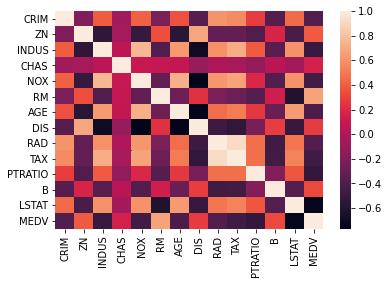

In [76]:
import seaborn as sns
boston_corr_matrix=boston_train.corr()
sns.heatmap(data=boston_corr_matrix, annot=False)

**bold text**
#Since "MEDV" is the targetted varibales, lets select the features whcih corelated both Positive and Negative.

#Do not Add varibles with low or non-existent corelation, as they cause the unnecessary Dimensionality Issues.

In [77]:
#Printing all the corelations to MEDV in Descending order
boston_corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.670963
ZN         0.387510
B          0.329432
DIS        0.280202
CHAS       0.156214
CRIM      -0.392849
RAD       -0.393258
AGE       -0.413612
NOX       -0.449965
TAX       -0.464379
INDUS     -0.498042
PTRATIO   -0.524866
LSTAT     -0.741302
Name: MEDV, dtype: float64

#Select two positive corelated variables (RM.ZN) and Two Negative Corelated (PTRATIO, LSTAT).

##Split the Data into various Features and Labels.
Here in this case the Feature will be (Target Variable 'MEDV) and labels will be 4 columns (RM,ZN, PTRAIO,LSTAT) that we seleceted from Corelation matrix.


In [78]:
boston_features=['RM','ZN','PTRATIO','LSTAT']
boston_labels=['MEDV']

print ('BOSTON DATA SET')
print ("Features _" + str (boston_features))
print ("Labels _ " + str(boston_labels))

boston_train_features=boston_train[boston_features]
boston_train_labels=boston_train[boston_labels]

boston_test_features=boston_test[boston_features]
boston_test_labels=boston_test[boston_labels]

BOSTON DATA SET
Features _['RM', 'ZN', 'PTRATIO', 'LSTAT']
Labels _ ['MEDV']


##Simple Liner Regression
 Y= B0 + B1X1
 Y=Dep Variable
 B1= Coefficient
 X1= Ind Variable

In [79]:
#Model Creation and Implemention

from sklearn.linear_model import LinearRegression

#Create a Model Object
lr=LinearRegression()

#Fit the Model into the Train Data set
lr.fit(boston_train_features,boston_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#Predecting the Test Set Results.
lr_predection=lr.predict(boston_test_features)
#Create the above predections and probabilities together to create a readable df
lr_df=pd.DataFrame(lr_predection.reshape(len(lr_predection),1))
lr_df.rename(columns={0:'lr_predection'},inplace=True)
lr_df.head()

,lr_predection
0,27.829478
1,28.173114
2,18.600315
3,23.346711
4,18.892405


In [81]:
##Concatnate the Predections of the linear regression to the Test Data Set

boston_test_predection=pd.concat((boston_test_labels,lr_df),axis=1)
boston_test_predection.head()


,MEDV,lr_predection
0,28.2,27.829478
1,23.9,28.173114
2,16.6,18.600315
3,22.0,23.346711
4,20.8,18.892405


In [82]:
#Intercepting the Coefficients 
print (lr.intercept_)

#Print the coefficient
print(lr.coef_)

##The intercept will be your b0 and coefficient will be b1.

[24.28507347]
[[ 3.82478846e+00 -2.96289190e-03 -9.82968918e-01 -5.93249451e-01]]


In [83]:
#Model Evaluation
#There are 3 promary metrics used to evaulate the liner regression models.
#1-Mean Absolute Error (MAE)
#2-Mean Squared Error (MSE)
#3-Root Mean Squared Error (RMSE)

#MAE: It is absolute Difference between Target value ("MDEV") and the Value Predected by Model.
#MSE: It is Avarage of Squared Difference between the Target Value and value Predected.
#RMSE: It is Squre root of the average Squared root difference between the target value and value predected. 

In [87]:
#Import Metrics library
from sklearn import metrics

#Import Numpy
import numpy as np

#Result of MAE
print(metrics.mean_absolute_error(boston_test_predection['MEDV'],boston_test_predection['lr_predection']))

#Result of MSE
print(metrics.mean_squared_error(boston_test_predection['MEDV'],boston_test_predection['lr_predection']))

#Result of RMSE
print(np.sqrt(metrics.mean_squared_error(boston_test_predection['MEDV'],boston_test_predection['lr_predection'])))



4.28125545229612
29.97447785621386
5.474895237008089
